# Delivrable 3 Captionning

# Sommaire

1. [Introduction](#1-introduction)
   - 1.1. [Objectif du projet](#11-objectif-du-projet)
   - 1.2. [Problématique](#12-problématique)

2. [Exploration du Dataset](#2-exploration-du-dataset)
   - 2.1. [Chemins du dataset](#21-chemins-du-dataset)
   - 2.2. [Exploration des résolutions d'images](#22-exploration-des-resolutions-dimages)
   - 2.3. [Répartition des annotations par catégorie](#23-repartition-des-annotations-par-categorie)
   - 2.4. [Répartition des annotations par image](#24-repartition-des-annotations-par-image)

3. [Préparation des légendes](#3-preparation-des-legendes)
    - 3.1. [Séparation des données en entraînement et validation](#31-separation-des-donnees-en-entrainement-et-validation)
4. [Architecture de Captioning d'Images](#4-architecture-de-captioning)
   - 4.1. [Merging Architecture](#41-injecting-architecture)
       - 4.1.1. [Choix du modèle CNN pour l'extraction de caractéristiques](#411-choix-du-modele-cnn-pour-lextraction-de-caracteristiques)
       - 4.1.2. [Transfert Learning](#412-transfert-learning)
           - 4.1.2.A. [Feature Extraction (Extraction de caractéristiques)](#412a-feature-extraction-extraction-de-caracteristiques)
           - 4.1.2.B. [Fine Tuning (Affinage)](#412b-fine-tuning-affinage)
           - 4.1.2.C. [Full Fine Tuning](#412c-full-fine-tuning)
       - 4.1.3. [Construction du modèle RNN](#413-construction-du-modele-rnn)
           - 4.1.3.A. [Construction du modèle LSTM](#413a-construction-du-modele-lstm)
           - 4.1.3.B. [Construction du modèle GRU](#413b-construction-du-modele-gru)
       - 4.1.4. [Entraînement des modèles](#414-entrainement-des-modeles)
       - 4.1.5. [Évaluation et tests](#415-evaluation-et-tests)
       - 4.1.6. [Tableau comparatif Injecting Architecture](#416-tableau-comparatif-injecting-architecture)

   - 4.2. [Injecting Architecture](#42-merging-architecture)
       - 4.2.1. [Choix du modèle CNN](#421-choix-du-modele-cnn)
       - 4.2.2. [Transfert Learning](#422-transfert-learning)
           - 4.2.2.A. [Feature Extraction](#422a-feature-extraction)
           - 4.2.2.B. [Fine Tuning](#422b-fine-tuning)
           - 4.2.2.C. [Full Fine Tuning](#422c-full-fine-tuning)
       - 4.2.3. [Construction du modèle RNN](#423-construction-du-modele-rnn)
           - 4.2.3.A. [Construction du modèle LSTM](#423a-construction-du-modele-lstm)
           - 4.2.3.B. [Construction du modèle GRU](#423b-construction-du-modele-gru)
       - 4.2.4. [Entraînement des modèles](#424-entrainement-des-modeles)
       - 4.2.5. [Évaluation et tests](#425-evaluation-et-tests)
       - 4.2.6. [Tableau comparatif Merging Architecture](#426-tableau-comparatif-merging-architecture)

5. [Conclusion](#5-conclusion)
   - 5.1. [Tableau comparatif final](#51-tableau-comparatif-final)


# 1-Introduction

La détection d'objets est un problème fondamentalement important à notre époque, car elle a des applications variées dans des domaines tels que la surveillance, les véhicules autonomes, et l'analyse d'images médicales. Ce problème se divise généralement en deux tâches principales :
- **Classification** : Identifier les objets présents dans une image en fonction de leurs caractéristiques visuelles (features).
- **Localisation d'objets** : Détecter la position précise de ces objets à l'aide de boîtes de délimitation ou de masques de segmentation.

Le principe de base est de retrouver, à partir d'une image, plusieurs objets afin de créer une description textuelle qui représente fidèlement le contenu visuel de l'image. Cette tâche est au cœur des défis actuels en vision par ordinateur, et plusieurs jeux de données ont été créés pour évaluer les performances des modèles dans ce domaine.

Parmi les plus utilisés, nous avons :
- **PASCAL-VOC** et
- **MS COCO**

**PASCAL VOC** est un dataset plus ancien et plus petit comparé à MS COCO. Conçu principalement pour des problèmes de détection et de segmentation d'objets, il offre un ensemble relativement réduit de classes, ce qui le rend utile pour des recherches académiques et pour tester rapidement des algorithmes sur un dataset de taille modeste.

Cependant, pour notre projet, nous allons utiliser le dataset **MS COCO** (Common Objects in Context). MS COCO est non seulement plus vaste, mais il introduit également des annotations plus complexes, telles que la segmentation d'objets par polygone et la génération de légendes d'images (captions). Pour exploiter pleinement la richesse de ce dataset, nous utiliserons des techniques de **transfert learning**. Le transfert learning est une approche couramment utilisée dans les projets de vision par ordinateur. Elle permet de tirer parti des connaissances qu'un modèle a déjà acquises sur un large ensemble de données, et d'améliorer ainsi les performances sur de nouveaux datasets avec moins de données et un temps d'entraînement réduit.

## 1.1-Objectif du projet

Dans ce projet, notre objectif est de concevoir un modèle capable de **générer automatiquement des légendes descriptives** pour des images en se basant sur le dataset **MS COCO**. Pour ce faire, nous allons exploiter une architecture de réseau de neurones à deux parties :
- **Un réseau CNN (Convolutional Neural Network)**, qui extrait les caractéristiques visuelles des images.
- **Un réseau RNN (Recurrent Neural Network)**, qui prend en entrée ces caractéristiques visuelles et génère des descriptions textuelles séquentielles (légendes) pour les images.

Le **réseau CNN** est responsable de l'encodage des images, en les convertissant en une représentation compacte. Cette représentation est ensuite utilisée par le **réseau RNN** pour produire des légendes descriptives en langage naturel. Le CNN utilisé dans ce projet sera un **modèle pré-entraîné**, tel que **ResNet**, **VGG**, ou **Inception**, initialement entraîné sur MS COCO pour la reconnaissance d'objets. Ce modèle sera ensuite ajusté pour répondre aux besoins de la génération de légendes.

## 1.2-Problématique

Le défi principal de ce projet est de développer un modèle capable de générer des **descriptions cohérentes et précises** pour des images complexes, où plusieurs objets interagissent. Cela inclut non seulement la détection des objets, mais aussi la compréhension du contexte et des relations entre ces objets, tout en produisant une phrase en langage naturel qui capture cette information. Il est également essentiel de pouvoir **évaluer automatiquement** la qualité des légendes générées à l'aide de métriques comme le **BLEU**.


# 2-Exploration du dataset

In [75]:
from pycocotools.coco import COCO
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import collections
import numpy as np
import os
import time
import json
from tqdm import tqdm
from PIL import Image

## 2.1-Chemins du dataset

In [137]:
# Définir le répertoire de base
base_dir = os.getcwd()
relative_path = r"../../DataSets/Dataset_delivrable_3"
dataset_dir = os.path.normpath(os.path.join(base_dir, relative_path))

# Chemin du fichier d'annotations
annotation_file = os.path.join(dataset_dir, 'annotations/captions_train2014.json')

# Chemin du dossier contenant les images à annoter
image_folder = os.path.join(dataset_dir, 'train2014/')
PATH = image_folder

# Affichage des chemins
print("Dossier des images d'entraînement:", image_folder)
print("Fichier des annotations d'entraînement:", annotation_file)


Dossier des images d'entraînement: c:\Users\steve\Documents\GitHub\DataSciencePictureDesc\DataSets\Dataset_delivrable_3\train2014/
Fichier des annotations d'entraînement: c:\Users\steve\Documents\GitHub\DataSciencePictureDesc\DataSets\Dataset_delivrable_3\annotations/captions_train2014.json


## 2.2 Lecture du fichier d'annotation et prétraitement des données

In [138]:
# Lecture du fichier d'annotation
with open(annotation_file, 'r') as f:
    annotations = json.load(f)

# --- Lecture des Annotations ---
image_path_to_caption = collections.defaultdict(list)
for val in annotations['annotations']:
    caption = val['caption']
    image_path = os.path.join(PATH, f"COCO_train2014_{val['image_id']:012d}.jpg")
    image_path_to_caption[image_path].append(caption)

# Vérifiez le contenu de image_path_to_caption
print(f"Nombre d'images avec annotations: {len(image_path_to_caption)}")


Nombre d'images avec annotations: 82783


In [139]:
coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.55s)
creating index...
index created!


In [85]:
caption_lengths = [len(cap.split()) for captions in image_path_to_caption.values() for cap in captions]
mean_caption_length = sum(caption_lengths) / len(caption_lengths)

print(f"Nombre total d'images : {len(train_image_paths)}")
print(f"Longueur moyenne des légendes : {mean_caption_length:.2f} mots")

Nombre total d'images : 6000
Longueur moyenne des légendes : 10.46 mots


il y a donc en moyenne 10 mot pour decrire une image

In [140]:
# Calculer le nombre de légendes par image
image_ids = coco.getImgIds()
captions_per_image = [len(coco.getAnnIds(imgIds=[img_id])) for img_id in image_ids]

# Statistiques
max_captions = max(captions_per_image)
min_captions = min(captions_per_image)
mean_captions = sum(captions_per_image) / len(captions_per_image)

print(f"Légendes par image - Max : {max_captions}, Min : {min_captions}, Moyenne : {mean_captions}")


Légendes par image - Max : 7, Min : 5, Moyenne : 5.0023917954169335


Ici, nous avons le nombre de légendes associées à chaque image.

## 2.2-Exploration de la répartition des résolution par image

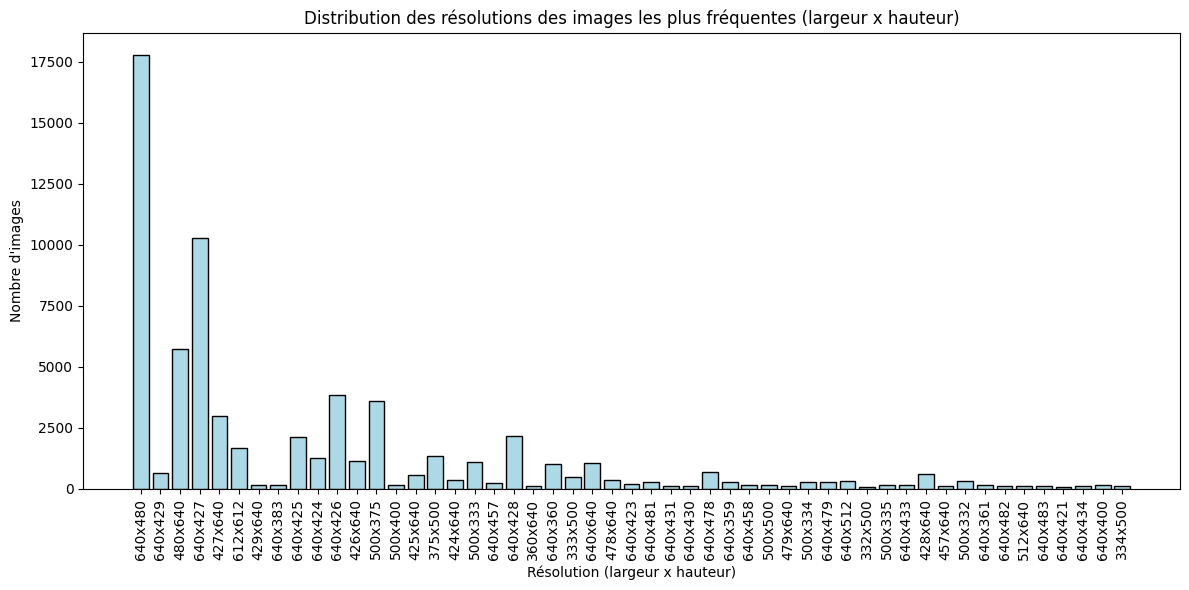

In [141]:
from collections import Counter
import matplotlib.pyplot as plt

# Charger toutes les images avec l'objet COCO
img_ids = coco.getImgIds()
img_data = coco.loadImgs(img_ids)

# Extraire les largeurs et hauteurs des images
heights = [img['height'] for img in img_data]
widths = [img['width'] for img in img_data]

# Créer une liste de tuples (largeur, hauteur)
dimensions = [(widths[i], heights[i]) for i in range(len(widths))]

# Compter le nombre d'images pour chaque résolution unique
dimension_counts = Counter(dimensions)

# Filtrer les dimensions les plus fréquentes (au moins 100 occurrences)
common_dimensions = {dim: count for dim, count in dimension_counts.items() if count >= 100}

# Extraire les résolutions et leur fréquence
resolutions, counts = zip(*common_dimensions.items())

# Générer des labels pour les résolutions sous la forme "largeur x hauteur"
resolution_labels = [f"{width}x{height}" for width, height in resolutions]

# Visualiser les résolutions les plus fréquentes
plt.figure(figsize=(12, 6))
plt.bar(resolution_labels, counts, color='lightblue', edgecolor='black')

# Ajouter un titre et des labels d'axes
plt.title('Distribution des résolutions des images les plus fréquentes (largeur x hauteur)')
plt.xlabel('Résolution (largeur x hauteur)')
plt.ylabel('Nombre d\'images')

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=90)

# Afficher le graphique avec ajustement
plt.tight_layout()
plt.show()


La majorité des images du dataset MS COCO ont des résolutions relativement homogènes, avec une forte concentration autour de résolutions comme 640x480 et 480x640. Cela signifie que nous pouvons envisager de redimensionner toutes les images à une résolution commune (comme 640x480), sans perdre trop de détails dans la majorité des images. 

## 2.3-Exploration de la répartition des annotation par catégorie

loading annotations into memory...
Done (t=0.31s)
creating index...
index created!


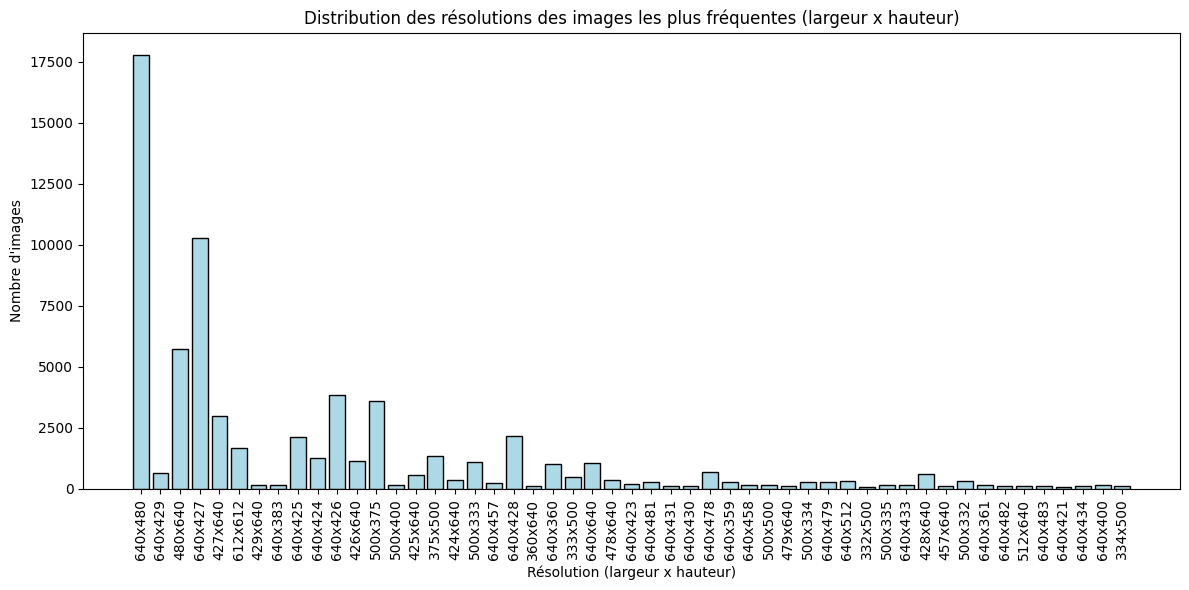

In [142]:
from collections import Counter
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

# Initialiser l'objet COCO avec le fichier d'annotations des légendes
annFile = os.path.join(dataset_dir, 'annotations/captions_train2014.json')
coco = COCO(annFile)

# Récupérer les IDs des images et charger les métadonnées
img_ids = coco.getImgIds()
img_data = coco.loadImgs(img_ids)

# Extraire les largeurs et hauteurs des images
heights = [img['height'] for img in img_data]
widths = [img['width'] for img in img_data]

# Créer une liste de tuples (largeur, hauteur)
dimensions = [(widths[i], heights[i]) for i in range(len(widths))]

# Compter le nombre d'images pour chaque résolution unique
dimension_counts = Counter(dimensions)

# Filtrer les dimensions les plus fréquentes (au moins 100 occurrences)
common_dimensions = {dim: count for dim, count in dimension_counts.items() if count >= 100}

# Extraire les résolutions et leur fréquence
resolutions, counts = zip(*common_dimensions.items())

# Générer des labels pour les résolutions sous la forme "largeur x hauteur"
resolution_labels = [f"{width}x{height}" for width, height in resolutions]

# Visualiser les résolutions les plus fréquentes
plt.figure(figsize=(12, 6))
plt.bar(resolution_labels, counts, color='lightblue', edgecolor='black')

# Ajouter un titre et des labels d'axes
plt.title('Distribution des résolutions des images les plus fréquentes (largeur x hauteur)')
plt.xlabel('Résolution (largeur x hauteur)')
plt.ylabel('Nombre d\'images')

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=90)

# Afficher le graphique avec ajustement
plt.tight_layout()
plt.show()


On observe qu'il y a un très grand nombre d'annotations pour la catégorie 'person', ce qui indique un déséquilibre entre les classes. Ce déséquilibre peut nuire à l'entraînement du modèle, car il risque de favoriser les catégories sur-représentées, comme 'person', au détriment des autres catégories moins fréquentes.

## 2.4-Exploration de la répartition des annotations par image

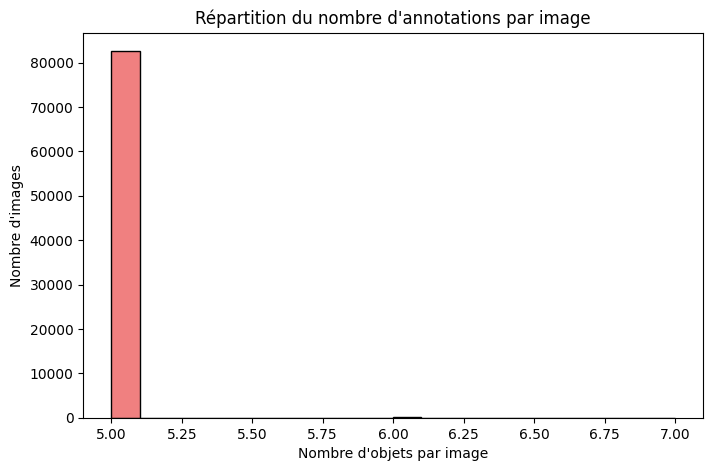

Nombre moyen d'objets par image : 5.00
Nombre maximal d'objets dans une image : 7


In [143]:
# Calculer le nombre d'annotations pour chaque image
image_ids = coco.getImgIds()  # Récupérer tous les ID d'images
annotations_per_image = [len(coco.getAnnIds(imgIds=[img_id])) for img_id in image_ids]

# Visualisation de la répartition du nombre d'annotations par image
plt.figure(figsize=(8, 5))
plt.hist(annotations_per_image, bins=20, color='lightcoral', edgecolor='black')

# Ajouter un titre et des labels d'axes
plt.title('Répartition du nombre d\'annotations par image')
plt.xlabel('Nombre d\'objets par image')
plt.ylabel('Nombre d\'images')

# Afficher le graphique
plt.show()

# Afficher des statistiques descriptives sur le nombre d'annotations
print(f"Nombre moyen d'objets par image : {sum(annotations_per_image) / len(annotations_per_image):.2f}")
print(f"Nombre maximal d'objets dans une image : {max(annotations_per_image)}")


- En moyenne, chaque image contient environ 7.31 objets. Cela signifie que les images dans ce dataset sont relativement complexes, avec plusieurs objets à détecter dans chaque image.

- Une grande proportion des images contient moins de 10 objets. Cela peut être plus facile à traiter pour des modèles de détection d'objets, mais cela signifie également qu'il existe une minorité d'images qui sont beaucoup plus complexes.

- Le nombre maximal d'objets annotés dans une image est 93, ce qui montre que certaines images du dataset sont extrêmement complexes. Ces images sont rares mais peuvent être des cas difficiles pour un modèle de détection d'objets.

# 3-Préparation-des-légendes

Avant d'utiliser les méthodes de transfert learning pour extraire les caractéristiques des images, nous devons préparer les légendes associées. Cela inclut la tokenisation des légendes et leur transformation en séquences numériques, qui seront utilisées pour entraîner le modèle LSTM.

## 3.1 Reduction du data set


In [144]:
train_image_paths = list(image_path_to_caption.keys())[:5000]
print(f"Nombre d'images sélectionnées pour l'entraînement : {len(train_image_paths)}")

Nombre d'images sélectionnées pour l'entraînement : 2000


In [145]:
# --- Collecte des légendes et des images associées ---
train_captions = []
img_name_vector = []

for image_path in train_image_paths:
    caption_list = image_path_to_caption[image_path]
    train_captions.extend(caption_list)
    img_name_vector.extend([image_path] * len(caption_list))

# Ajouter des tokens de début et de fin aux captions
train_captions = ['start ' + caption + ' end' for caption in train_captions]


## 3.2 Tokenisation des légendes

In [146]:
# --- Tokenization des légendes ---
top_k = 5000  # Limite le vocabulaire à 5000 mots les plus fréquents
custom_filters = '!"#$%&()*+,-./:;=?@[\]^_`{|}~\t\n'
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k, oov_token="<unk>", filters=custom_filters)
tokenizer.fit_on_texts(train_captions)

# Convertir les légendes en séquences d'entiers et les padder
train_seqs = tokenizer.texts_to_sequences(train_captions)
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

# Calcul de la longueur maximale des séquences
def calc_max_length(sequences):
    return max(len(seq) for seq in sequences)

max_length = calc_max_length(train_seqs)
print(f"Longueur maximale des séquences: {max_length}")


Longueur maximale des séquences: 33


In [147]:
# --- Division des données en entraînement et validation ---
img_name_train, img_name_val, cap_train, cap_val = train_test_split(
    img_name_vector, cap_vector, test_size=0.2, random_state=42)

print(f"Nombre d'échantillons d'entraînement : {len(img_name_train)}")
print(f"Nombre d'échantillons de validation : {len(img_name_val)}")


Nombre d'échantillons d'entraînement : 8004
Nombre d'échantillons de validation : 2001


# 4-Architecture de Captioning

Il existe plusieurs architectures pour générer des légendes à partir d'images. Nous nous concentrerons sur deux approches principales :

- Injecting Architecture
- Merging Architecture

## 4.1-Merging Architecture

Dans cette architecture, le modèle CNN (pré-entraîné) extrait des caractéristiques visuelles des images, qui sont ensuite injectées dans un RNN (par exemple, LSTM) pour générer les légendes

![image.png](https://miro.medium.com/v2/resize:fit:750/format:webp/1*cDqencLttz0zkWc__4CfFQ.png)

### 4.1.1-Choix du modèle CNN pour extraction de caractéristiques :

| **Modèle**         | **Taille des Entrées** | **Nombre de Paramètres** | **Profondeur** | **Taille du Modèle** | **Performance (ImageNet)** | **Avantages**                          | **Inconvénients**                        |
|--------------------|------------------------|--------------------------|----------------|----------------------|----------------------------|----------------------------------------|------------------------------------------|
| **InceptionV3**    | 299x299                | ~23.8 millions            | 48 couches     | ~92 MB               | Top-1: 77.9%                | - Bonne efficacité pour des tâches complexes<br>- Relativement léger | - Taille d'entrée spécifique (299x299)<br>- Plus complexe que ResNet pour certains cas |
| **ResNet50**       | 224x224                | ~25.6 millions            | 50 couches     | ~98 MB               | Top-1: 76.2%                | - Très populaire pour le transfert learning<br>- Facile à utiliser<br>- Bon équilibre entre profondeur et performance | - Peut être trop profond pour des tâches simples |
| **VGG16**          | 224x224                | ~138 millions             | 16 couches     | ~528 MB              | Top-1: 71.5%                | - Facile à comprendre et à implémenter<br>- Très utilisé dans les benchmarks | - Très grand nombre de paramètres (lent et gourmand en mémoire) |
| **EfficientNet-B0**| 224x224                | ~5.3 millions             | 82 couches     | ~29 MB               | Top-1: 77.1%                | - Très efficace en termes de taille de modèle et de calcul<br>- Bon compromis entre performance et légèreté | - Moins utilisé que ResNet ou Inception (moins de ressources disponibles) |
| **MobileNetV2**    | 224x224                | ~3.5 millions             | 53 couches     | ~14 MB               | Top-1: 71.8%                | - Modèle très léger<br>- Idéal pour des applications mobiles ou embarquées | - Performances inférieures aux autres modèles pour les tâches complexes |
| **Xception**       | 299x299                | ~22.9 millions            | 71 couches     | ~88 MB               | Top-1: 79.0%                | - Basé sur Inception, mais plus efficace pour certaines tâches<br>- Très performant | - Moins utilisé et documenté que ResNet ou Inception |
| **DenseNet121**    | 224x224                | ~8 millions               | 121 couches    | ~33 MB               | Top-1: 74.9%                | - Réseau très compact<br>- Moins de paramètres pour de bonnes performances | - Complexité due à la densité des connexions (plus lent à entraîner) |



Le transfert learning est une technique qui consiste à réutiliser un modèle pré-entraîné sur un large dataset (comme ImageNet) pour une nouvelle tâche spécifique. Cela permet d’accélérer le processus d’apprentissage et d’améliorer les performances, surtout lorsque l’on dispose de moins de données pour entraîner un modèle de zéro. Voici les principales approches du transfert learning :

### 4.1.2-Transfert learning

Le transfert learning est une technique qui consiste à réutiliser un modèle pré-entraîné sur un large dataset (comme ImageNet) pour une nouvelle tâche spécifique. Cela permet d’accélérer le processus d’apprentissage et d’améliorer les performances, surtout lorsque l’on dispose de moins de données pour entraîner un modèle de zéro. Voici les principales approches du transfert learning :

| **Technique**                 | **Description**                                                                                   | **Quand l'utiliser ?**                                                                 | **Avantages**                                                     | **Inconvénients**                                                       |
|-------------------------------|---------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------|-------------------------------------------------------------------|--------------------------------------------------------------------------|
| **Feature Extraction**         | Utiliser un modèle pré-entraîné pour extraire des **caractéristiques fixes** sans ré-entraîner le modèle. | Lorsque tu veux utiliser un modèle pré-entraîné sans le ré-entraîner sur ton dataset.   | - Rapide<br>- Nécessite peu de données.                                 | - Caractéristiques pas toujours parfaitement adaptées à ton dataset si celui-ci est très différent du dataset d'origine.    |
| **Fine Tuning (Affinage)**     | **Dégeler** certaines couches du modèle pré-entraîné et les ré-entraîner sur ton dataset spécifique. | Lorsque tu veux adapter partiellement un modèle pré-entraîné à ton dataset.             | - Adaptation plus fine au dataset<br>- Améliore souvent les performances. | - Nécessite plus de temps d'entraînement<br>- Risque de surajustement si peu de données.         |
| **Full Fine-Tuning**           | **Dégeler toutes les couches** du modèle pré-entraîné et les ré-entraîner entièrement sur ton dataset. | Lorsque ton dataset est très différent du dataset d'origine du modèle pré-entraîné.     | - Flexibilité maximale pour adapter au dataset spécifique.           | - Très long à entraîner<br>- Nécessite beaucoup de données pour éviter le surapprentissage.                    |


In [149]:
image_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

#### 4.1.2.A-Feature Extraction (Extraction des caractéristiques)

![image.png](https://www.researchgate.net/publication/363695026/figure/fig3/AS:11431281085332127@1663720421792/Feature-Extraction-in-Transfer-Learning.png)

Commencons par utiliser **InceptionV3**, nous allons extraire les caractéristiques (features) du modèle 

In [150]:
features_dir = 'extracted_features/'
os.makedirs(features_dir, exist_ok=True)
image_model.trainable = False  # Geler les couches du modèle

new_input = tf.keras.Input(shape=(299, 299, 3))
hidden_layer = image_model(new_input)
image_features_extract_model = tf.keras.Model(inputs=new_input, outputs=hidden_layer)

def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [299, 299])
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

# Pré-traitement des images
encode_train = sorted(set(img_name_vector))
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(16)

# Extraction et sauvegarde des features d'image
for img, path in tqdm(image_dataset, desc="Extraction des features d'image"):
    batch_features = image_features_extract_model(img)
    batch_features = tf.reduce_mean(batch_features, axis=[1, 2])  # Global Average Pooling
    
    for bf, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        file_name = os.path.basename(path_of_feature)
        save_path = os.path.join(features_dir, file_name + "_extract_features.npy")
        np.save(save_path, bf.numpy())


Extraction des features d'image: 100%|██████████| 125/125 [01:02<00:00,  2.00it/s]


Après avoir chargé les annotations et les images du dataset MS COCO, nous avons extrait les **caractéristiques visuelles** d'une image en utilisant le modèle pré-entraîné **InceptionV3**.

- Le message **"Loading annotations into memory..."** indique que les annotations du dataset ont été chargées et indexées, ce qui permet de manipuler les légendes et les images du dataset plus facilement.
  
- Ensuite, nous avons extrait les caractéristiques d'une image avec InceptionV3. Les **dimensions des caractéristiques extraites** sont **(1, 8, 8, 2048)** :
  - **1** : Correspond à la taille du lot (ici, 1 image est traitée).
  - **8x8** : Taille de la carte de caractéristiques générée par les couches convolutionnelles du modèle. Elle représente un résumé spatial de l'image.
  - **2048** : Nombre de filtres ou de canaux. Chaque canal capture une caractéristique visuelle particulière (textures, formes, etc.).

Ces caractéristiques seront ensuite utilisées comme entrée dans le modèle **LSTM** pour générer des légendes basées sur ces informations visuelles.


### 4.1.2.B-fine tuning affinage

![image.png](https://www.researchgate.net/profile/Esra-Alhadhrami/publication/326048343/figure/fig1/AS:643818495950849@1530509699224/Transfer-learning-approaches-a-Fine-tuning-b-CNN-as-feature-extractor.png)

In [46]:
# à completer

100%|██████████| 125/125 [00:57<00:00,  2.17it/s]


### 4.1.2.C-Full Fine Tuning

In [47]:
# à completer

100%|██████████| 125/125 [00:57<00:00,  2.18it/s]


### 4.1.3-Construction du modele RNN

Les RNN (Réseaux de Neurones Récurents) sont particulièrement adaptés pour modéliser les données séquentielles, comme le langage naturel. Contrairement aux réseaux de neurones traditionnels, les RNN peuvent conserver une mémoire des états passés lors du traitement d'une séquence, ce qui est essentiel pour comprendre le contexte dans les tâches comme la génération de légendes d'images.

Dans le cadre de ce projet, les RNN sont utilisés pour générer des légendes descriptives d'images, car ils peuvent modéliser les relations entre les mots d'une légende et apprendre comment une séquence de mots est structurée. En combinant cela avec les caractéristiques visuelles extraites des images via des techniques de transfert learning, le modèle peut comprendre à la fois l'information visuelle et textuelle.

#### Comparatif des architectures RNN existantes

| Architecture RNN | Description | Avantages | Inconvénients |
|------------------|-------------|-----------|---------------|
| **RNN simple**   | Le réseau récurrent classique, qui traite chaque élément d'une séquence un par un tout en conservant une mémoire de l'état précédent. | - Simple à implémenter.<br>- Moins de paramètres que LSTM ou GRU. | - **Problème de gradient qui disparaît**, surtout sur de longues séquences.<br>- Ne peut pas bien modéliser les longues dépendances. |
| **LSTM (Long Short-Term Memory)** | Variante des RNN, avec des mécanismes de mémoire (cellules LSTM, portes d'entrée, d'oubli et de sortie) pour conserver l'information sur de longues séquences. | - Capable de capturer des **longues dépendances**.<br>- Gère mieux le problème de gradient qui disparaît. | - Plus complexe et plus lent à entraîner en raison du nombre élevé de paramètres.<br>- Plus coûteux en mémoire. |
| **GRU (Gated Recurrent Unit)** | Variante simplifiée des LSTM, avec un mécanisme de **portes** (porte de mise à jour et porte de réinitialisation) pour contrôler le flux d'information. | - **Moins de paramètres** que LSTM, donc plus rapide et moins coûteux à entraîner.<br>- Performances comparables aux LSTM sur de nombreuses tâches. | - Moins flexible que LSTM pour capturer des dépendances complexes.<br>- Peut être moins performant que LSTM sur de très longues séquences. |
| **Bi-RNN (RNN bidirectionnel)** | Les **RNN bidirectionnels** traitent une séquence dans les deux sens (avant et arrière), permettant au réseau de prendre en compte le contexte passé et futur. | - Peut mieux capturer le contexte global d'une séquence. | - Double le nombre de calculs.<br>- Plus complexe et coûteux en temps et en mémoire. |


![image.png](https://aiml.com/wp-content/uploads/2023/10/rnn-lstm-gru-transformers.png)

### 4.1.3.A Mécanisme d'attention

In [151]:
class BahdanauAttention(tf.keras.Model):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
        attention_hidden_layer = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))
        score = self.V(attention_hidden_layer)
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights


### 4.1.3.A-Construction du modèle lstm

![image.png](https://media.licdn.com/dms/image/v2/D5612AQH7ywLf6xH_rA/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1690356194969?e=2147483647&v=beta&t=S-frcgtTyzrBWZ0K3K_GqK8dZ6OGA5oPtLzIRwRG74M)

In [ ]:
# à completer

### 4.1.3.B Construction du modèle GRU

![image.png](https://www.researchgate.net/publication/350463426/figure/fig4/AS:1012181290201090@1618334233899/Structure-of-the-gated-recurrent-unit-GRU-recurrent-network.jpg)

In [153]:
# Définition des paramètres
embedding_dim = 256
units = 512
vocab_size = top_k + 1  # +1 pour le token <unk>
feature_dim = 2048  # Après Global Average Pooling

In [154]:
class RNN_Decoder(tf.keras.Model):
    def __init__(self, embedding_dim, units, vocab_size):
        super(RNN_Decoder, self).__init__()
        self.units = units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.units, return_sequences=True, return_state=True)
        self.fc1 = tf.keras.layers.Dense(self.units)
        self.fc2 = tf.keras.layers.Dense(vocab_size)
        self.attention = BahdanauAttention(self.units)

    def call(self, x, features, hidden):
        context_vector, attention_weights = self.attention(features, hidden)
        x = self.embedding(x)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        output, state = self.gru(x)
        x = self.fc1(output)
        x = tf.reshape(x, (-1, x.shape[2]))
        x = self.fc2(x)
        return x, state, attention_weights

    def reset_state(self, batch_size):
        return tf.zeros((batch_size, self.units))


In [157]:
# Création du modèle de décodage
caption_model = RNN_Decoder(embedding_dim, units, vocab_size)
caption_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
caption_model.summary()



Model: "rnn__decoder_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_29 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_28 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bahdanau_attention_18           │ ?                      │   0 (unbuilt) │
│ (BahdanauAttention)             │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Préparation des datasets 

In [158]:
# --- Préparation des datasets ---
def map_func(img_name, cap):
    img_tensor = np.load(os.path.join(features_dir, os.path.basename(img_name.numpy().decode('utf-8')) + "_extract_features.npy"))
    return img_tensor.astype(np.float32), cap

def tf_map_func(img_name, cap):
    img_tensor, cap = tf.py_function(map_func, [img_name, cap], [tf.float32, tf.int32])
    img_tensor.set_shape((feature_dim,))
    cap.set_shape((max_length,))
    return img_tensor, cap

train_dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))
train_dataset = train_dataset.map(tf_map_func, num_parallel_calls=tf.data.AUTOTUNE).shuffle(1000).batch(64).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((img_name_val, cap_val))
val_dataset = val_dataset.map(tf_map_func, num_parallel_calls=tf.data.AUTOTUNE).batch(64).prefetch(tf.data.AUTOTUNE)


### 4.1.4.Entraînement des modèle

In [128]:
# --- Boucle d'entraînement ---
EPOCHS = 20
loss_plot = []

for epoch in range(EPOCHS):
    start = time.time()
    total_loss = 0
    
    for (batch, (img_tensor, target)) in enumerate(tqdm(train_dataset, desc=f"Epoch {epoch+1}/{EPOCHS}")):
        loss = 0
        with tf.GradientTape() as tape:
            hidden = caption_model.reset_state(batch_size=target.shape[0])
            dec_input = tf.expand_dims([tokenizer.word_index['start']] * target.shape[0], 1)
            for i in range(1, target.shape[1]):
                predictions, hidden, _ = caption_model(dec_input, img_tensor, hidden)
                loss += tf.keras.losses.sparse_categorical_crossentropy(target[:, i], predictions, from_logits=True)
                dec_input = tf.expand_dims(target[:, i], 1)

            batch_loss = tf.reduce_mean(loss) / int(target.shape[1])
        
        gradients = tape.gradient(batch_loss, caption_model.trainable_variables)
        caption_model.optimizer.apply_gradients(zip(gradients, caption_model.trainable_variables))
        total_loss += batch_loss

    avg_loss = total_loss / (batch + 1)
    loss_plot.append(avg_loss)
    
    print(f'Epoch {epoch+1}/{EPOCHS}, Loss: {avg_loss:.4f}, Time: {time.time() - start:.2f} sec')


Epoch 1/20: 100%|██████████| 126/126 [04:17<00:00,  2.04s/it]


Epoch 1/20, Loss: 2.0533, Time: 257.46 sec


Epoch 2/20: 100%|██████████| 126/126 [06:54<00:00,  3.29s/it]


Epoch 2/20, Loss: 1.5262, Time: 414.74 sec


Epoch 3/20: 100%|██████████| 126/126 [03:53<00:00,  1.85s/it]


Epoch 3/20, Loss: 1.4504, Time: 233.26 sec


Epoch 4/20: 100%|██████████| 126/126 [04:14<00:00,  2.02s/it]


Epoch 4/20, Loss: 1.3975, Time: 254.14 sec


Epoch 5/20:  61%|██████    | 77/126 [02:24<01:35,  1.95s/it]

In [ ]:
# --- Visualisation de la courbe de perte ---
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
